In [2]:
install.packages("vegan")
library("vegan")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: permute

Loading required package: lattice



In [3]:
library("nlme")

In [4]:
#load data
url_env <- "https://bit.ly/pondsenv"
pondsenv <- read.csv(url(url_env))

url_diat <- "https://bit.ly/pondsdiat"
pondsdiat <- read.csv(url(url_diat))

In [5]:
#pca
pondspca <- pca(pondsenv, scale = TRUE)
pondspca

Call: pca(X = pondsenv, scale = TRUE)

-- Model Summary --

              Inertia Rank
Total              15     
Unconstrained      15   15

Inertia is correlations

-- Eigenvalues --

Eigenvalues for unconstrained axes:
  PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12  PC13 
4.964 3.094 2.329 1.428 0.772 0.626 0.534 0.398 0.309 0.293 0.128 0.069 0.029 
 PC14  PC15 
0.019 0.010 


In [7]:
#divide each eignvalue by the total intertia
summary(eigenvals(pondspca))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Eigenvalue,4.9639419,3.0937327,2.3289289,1.42777717,0.77180304,0.62608729,0.53371658,0.39793230,0.3090240,0.29284020,0.127766567,0.069340213,0.028661260,0.018653517,0.009794264
Proportion Explained,0.3309295,0.2062488,0.1552619,0.09518514,0.05145354,0.04173915,0.03558111,0.02652882,0.0206016,0.01952268,0.008517771,0.004622681,0.001910751,0.001243568,0.000652951
Cumulative Proportion,0.3309295,0.5371783,0.6924402,0.78762538,0.83907892,0.88081807,0.91639918,0.94292800,0.9635296,0.98305228,0.991570050,0.996192731,0.998103481,0.999347049,1.000000000


In [8]:
#What are the values of \(\lambda_1\) and \(\lambda_2\), the eigenvalues for axes one and two?
# lambda1 is 4.9639 and lambda2 is 3.094

#How much of the total variance in the environmental data is explained by axes one and two individually and cummulatively?
# PC1- 0.3309295
#PC2- 0.2062488
#cumulative- is the cumulative of the two 0.5372? or the separate ones?

In [9]:
summary(pondspca)


Call:
pca(X = pondsenv, scale = TRUE) 

Partitioning of correlations:
              Inertia Proportion
Total              15          1
Unconstrained      15          1

Eigenvalues, and their contribution to the correlations 

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Eigenvalue            4.9639 3.0937 2.3289 1.42778 0.77180 0.62609 0.53372
Proportion Explained  0.3309 0.2062 0.1553 0.09519 0.05145 0.04174 0.03558
Cumulative Proportion 0.3309 0.5372 0.6924 0.78763 0.83908 0.88082 0.91640
                          PC8    PC9    PC10     PC11     PC12     PC13
Eigenvalue            0.39793 0.3090 0.29284 0.127767 0.069340 0.028661
Proportion Explained  0.02653 0.0206 0.01952 0.008518 0.004623 0.001911
Cumulative Proportion 0.94293 0.9635 0.98305 0.991570 0.996193 0.998103
                          PC14     PC15
Eigenvalue            0.018654 0.009794
Proportion Explained  0.001244 0.000653
Cumulative Proportion 0.999347 1.0000

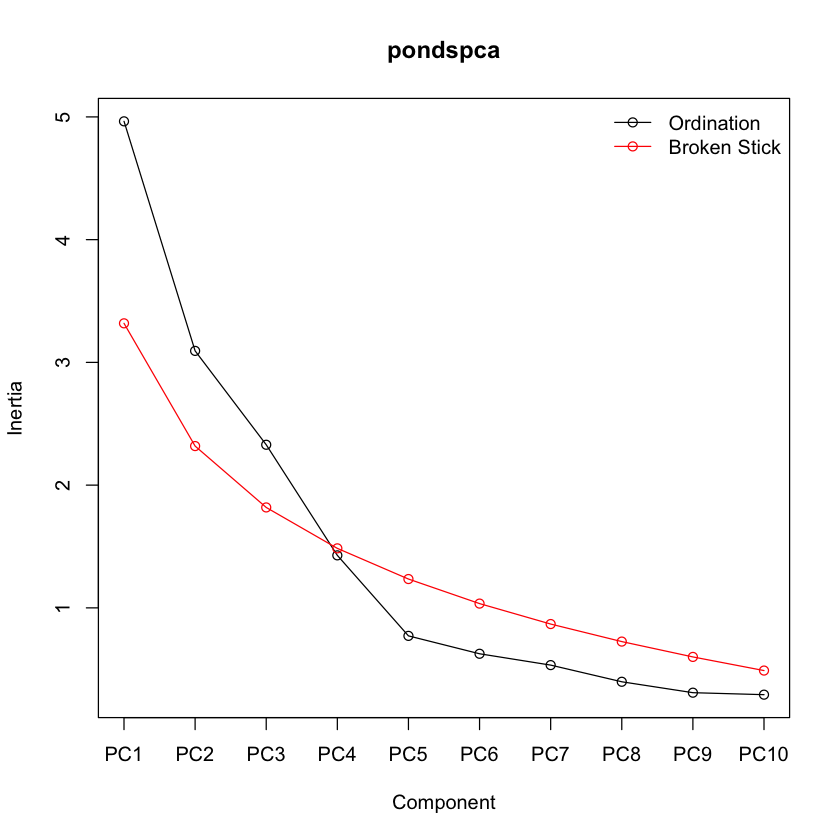

In [10]:
#decide how many PCA axes are good to use with broken stick method 
#4 is ideal
screeplot(pondspca, type = "lines", bstick = TRUE)

In [12]:
#How many axes does the scree plot suggest are significant?
#2 axes
#How many axes does the broken-stick distribution suggest are significant?
# 4 axes

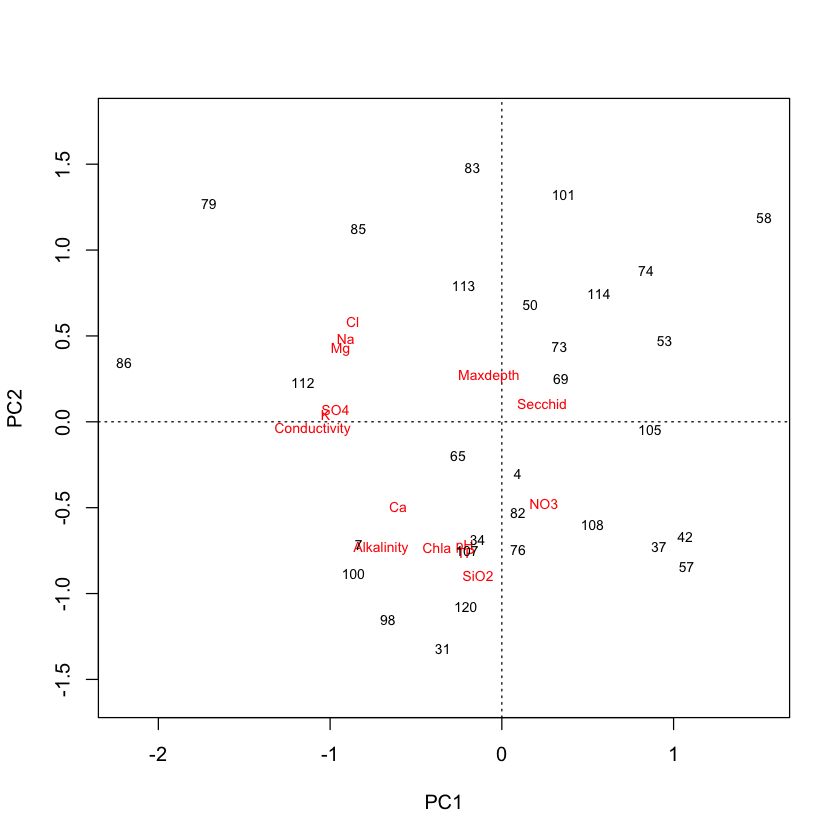

In [13]:
#focus on the correlation between environmental variables (species) so use a correlation biplot and scale with species
plot(pondspca, scaling = "species")

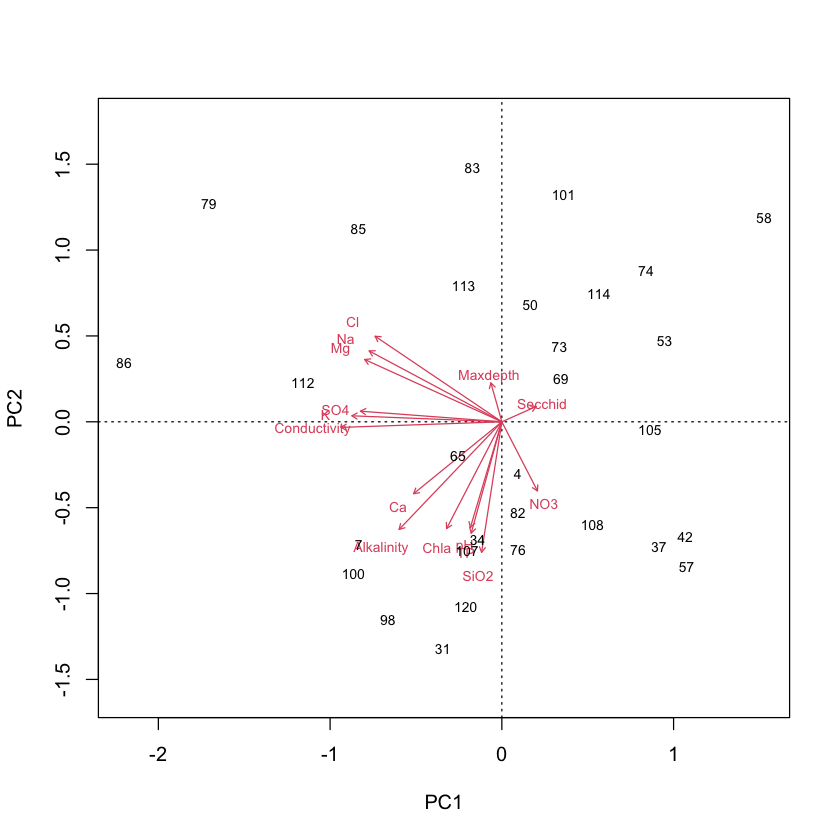

In [14]:
#add biplot arrows
biplot(pondspca, scaling = "species")

In [17]:
#What are the main chemical gradients represented by axes one and two?
# conductivity represents PC2, SiO2 represents PC1
#Are there any outliers sites on axes one or two?
#socchid is an outlier



Family: gaussian 
Link function: identity 

Formula:
y ~ s(x1, x2, k = 10, bs = "tp", fx = FALSE)

Estimated degrees of freedom:
2.3  total = 3.3 

REML score: 10.03019     

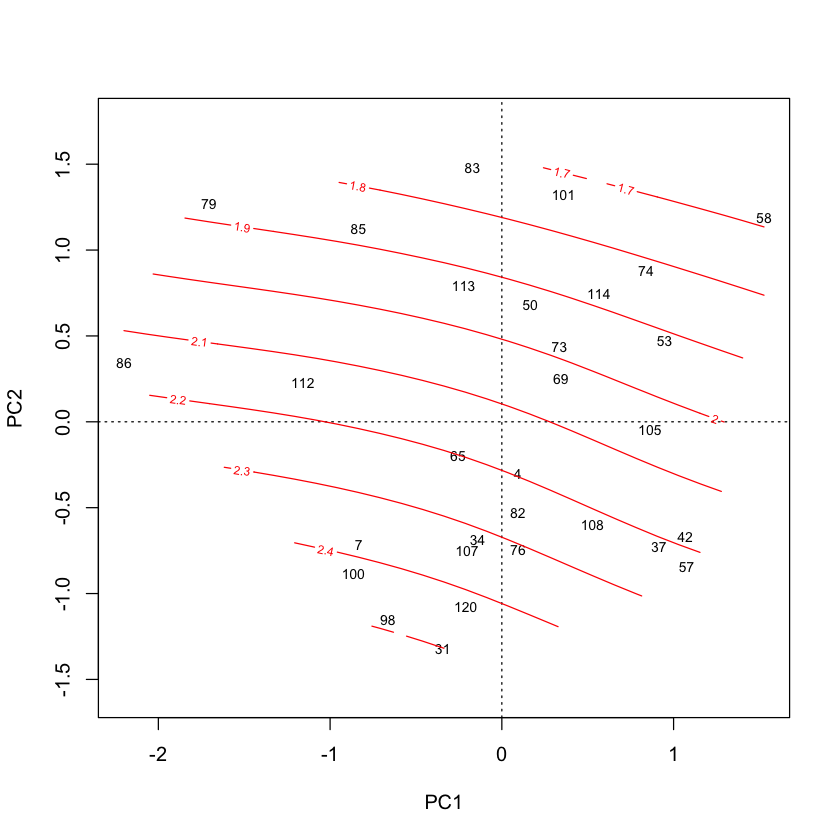

In [16]:
#linear interpolation 
#redisplayed with the species suppressed (display = "sites")
#response surface for the variables TP (Total Phosphorus)
#The argument add = TRUE is used to add the response surface to the plot w/o clearing the graphics device first.
plot(pondspca, scaling = "species", display = "sites")
ordisurf(pondspca ~ TP, data = pondsenv, add = TRUE)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x1, x2, k = 10, bs = "tp", fx = FALSE)

Estimated degrees of freedom:
0.0001  total = 1 

REML score: 23.91293     

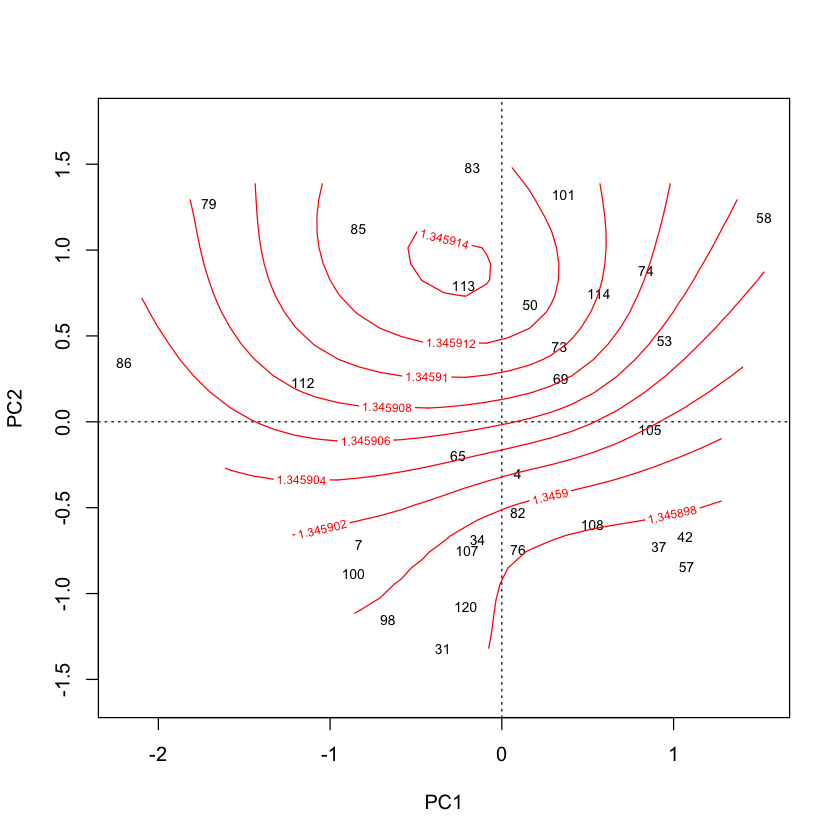

In [18]:
#Make response surface plots for selected variables
plot(pondspca, scaling = "species", display = "sites")
ordisurf(pondspca ~ Maxdepth, data = pondsenv, add = TRUE)
#Which variables respond non-linearly across the ordination?
#max depth responds non-linearly

In [19]:
#downweight rare species for more stable results
pondsca <- cca(downweight(pondsdiat))
pondsca

Call: cca(X = downweight(pondsdiat))

-- Model Summary --

              Inertia Rank
Total           4.996     
Unconstrained   4.996   29

Inertia is scaled Chi-square

-- Eigenvalues --

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8 
0.6728 0.5162 0.4199 0.3619 0.3408 0.3254 0.2913 0.2663 
(Showing 8 of 29 unconstrained eigenvalues)


In [21]:
summary(eigenvals(pondsca))

,CA1,CA2,CA3,CA4,CA5,CA6,CA7,CA8,CA9,CA10,⋯,CA20,CA21,CA22,CA23,CA24,CA25,CA26,CA27,CA28,CA29
Eigenvalue,0.6727545,0.5162214,0.41994421,0.36190683,0.34084808,0.32535271,0.29127227,0.26632036,0.22194702,0.21171847,⋯,0.06392414,0.05187759,0.035946849,0.03476757,0.023473398,0.019797029,0.014480826,0.012439095,0.009305048,0.001901513
Proportion Explained,0.1346646,0.1033315,0.08405982,0.07244254,0.06822723,0.06512553,0.05830369,0.05330909,0.04442692,0.04237948,⋯,0.01279563,0.01038429,0.007195446,0.00695939,0.004698647,0.003962752,0.002898613,0.002489922,0.001862582,0.000380624
Cumulative Proportion,0.1346646,0.2379961,0.32205597,0.39449851,0.46272573,0.52785127,0.58615495,0.63946404,0.68389096,0.72627044,⋯,0.95916774,0.96955202,0.976747470,0.98370686,0.988405507,0.992368259,0.995266872,0.997756794,0.999619376,1.000000000


In [ ]:
#What are the values of \(\lambda_{1-4}\), the eigenvalues for axes one to four?
# CA1 0.67275
# CA2 0.516221
# CA3 0.41994
# CA4 0.36190

#How much of the total variance (inertia) in the species data is explained by axes 1 and 2, individually and combined?
# CA1 0.13466
# CA2 0.10333
# combined 	0.23799

In [22]:
summary(pondsca)


Call:
cca(X = downweight(pondsdiat)) 

Partitioning of scaled Chi-square:
              Inertia Proportion
Total           4.996          1
Unconstrained   4.996          1

Eigenvalues, and their contribution to the scaled Chi-square 

Importance of components:
                         CA1    CA2     CA3     CA4     CA5     CA6    CA7
Eigenvalue            0.6728 0.5162 0.41994 0.36191 0.34085 0.32535 0.2913
Proportion Explained  0.1347 0.1033 0.08406 0.07244 0.06823 0.06513 0.0583
Cumulative Proportion 0.1347 0.2380 0.32206 0.39450 0.46273 0.52785 0.5862
                          CA8     CA9    CA10    CA11   CA12    CA13    CA14
Eigenvalue            0.26632 0.22195 0.21172 0.20888 0.1659 0.14270 0.13265
Proportion Explained  0.05331 0.04443 0.04238 0.04181 0.0332 0.02856 0.02655
Cumulative Proportion 0.63946 0.68389 0.72627 0.76808 0.8013 0.82985 0.85640
                         CA15    CA16    CA17    CA18    CA19    CA20    CA21
Eigenvalue            0.11605 0.10483 0.08433 0.07

In [23]:
scores(pondsca)

,CA1,CA2
AC001A,-0.42403931,-0.760350815
AC013A,-0.17002187,-1.037035350
AC013E,-0.13793700,-2.395393541
AM011A,0.20452792,-0.161507596
AM012A,-0.04377094,0.127401543
AS001A,0.70371098,0.068915197
AU002A,-0.73360745,0.507448370
AU003B,0.60459611,-0.246680456
CC001A,1.27492017,0.924866675
CC002A,0.94403823,0.352461828


In [25]:
scores(pondsca, scaling = "symmetric")

,CA1,CA2
AC001A,-0.46821138,-0.89702596
AC013A,-0.18773301,-1.22344530
AC013E,-0.15230587,-2.82597210
AM011A,0.22583355,-0.19053903
AM012A,-0.04833055,0.15030232
AS001A,0.77701638,0.08130289
AU002A,-0.81002716,0.59866361
AU003B,0.66757674,-0.29102194
CC001A,1.40772829,1.09111400
CC002A,1.04237846,0.41581781


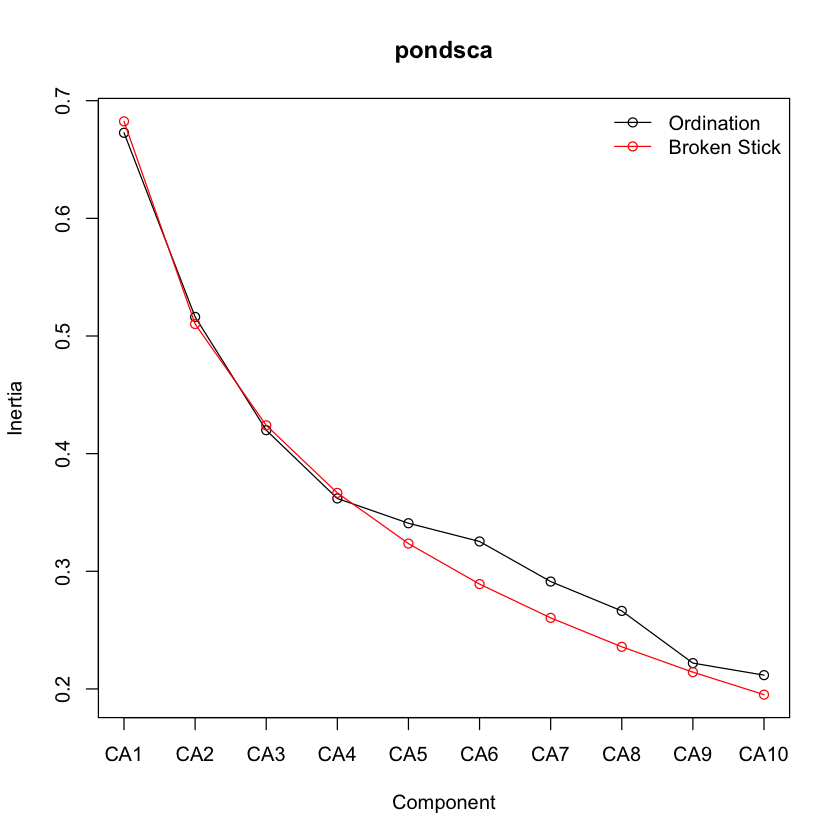

In [26]:
screeplot(pondsca, bstick = TRUE, type = "lines")

In [27]:
#How many axes are important when compared with the null model?
# 4 axes are important 

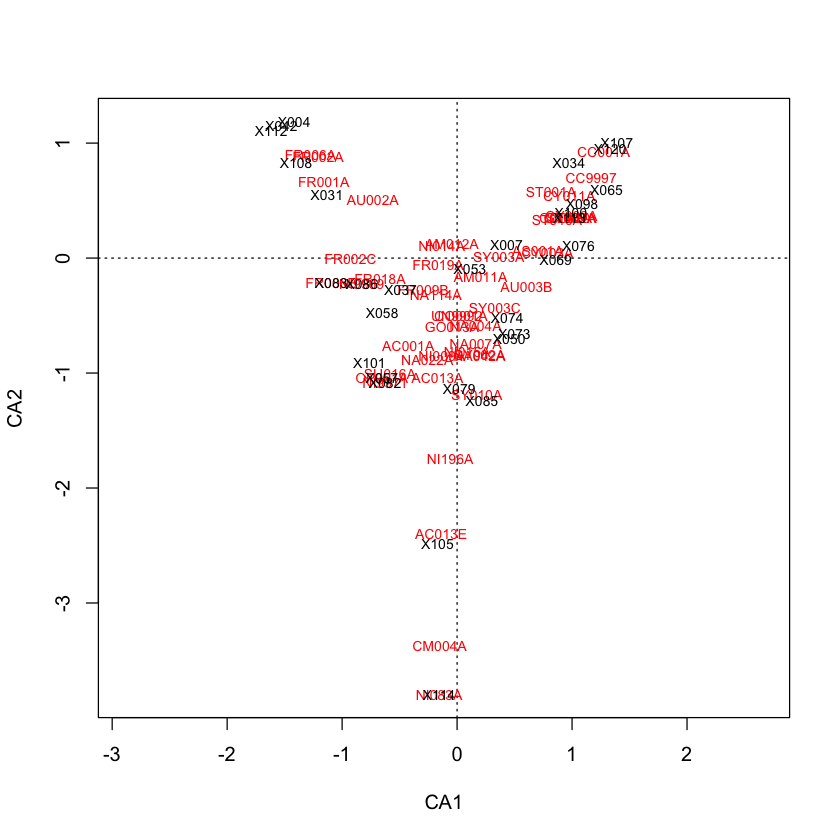

In [28]:
plot(pondsca)

In [30]:
#Are there outliers in the plot (species or samples)?
#yes there are some outliers 


#Is there an arch apparent in the biplot?
#yes and the biplot() doesnt work because it is not linear

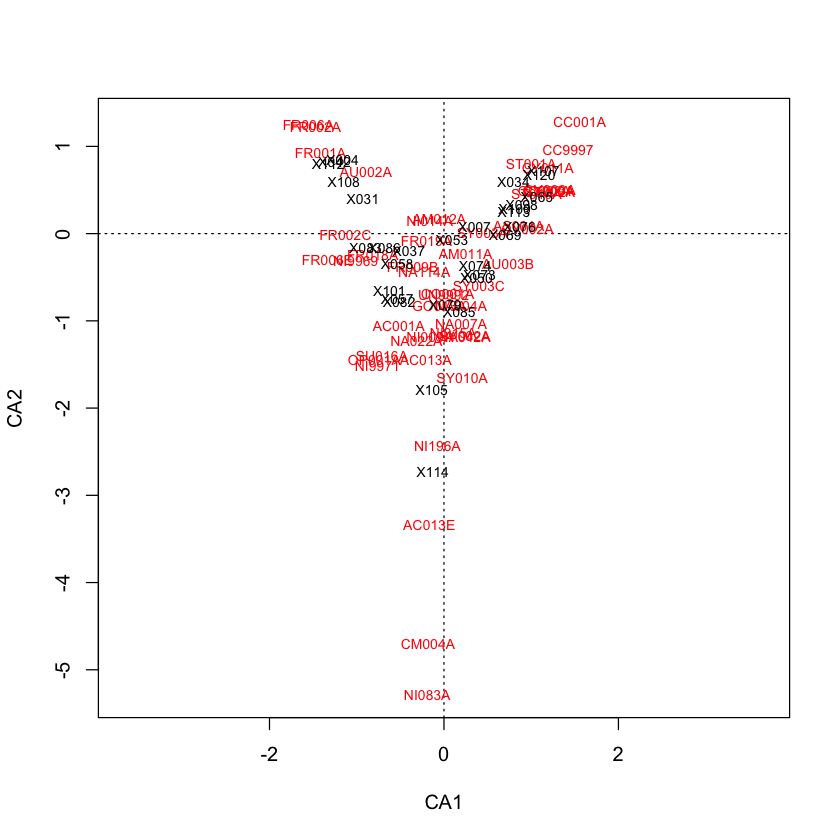

In [31]:
plot(pondsca, scaling = "site")

In [32]:
spp.n2 <- renyi(t(pondsdiat), scales = 2, hill = TRUE)
site.n2 <- renyi(pondsdiat, scales = 2, hill = TRUE)

integer(0)

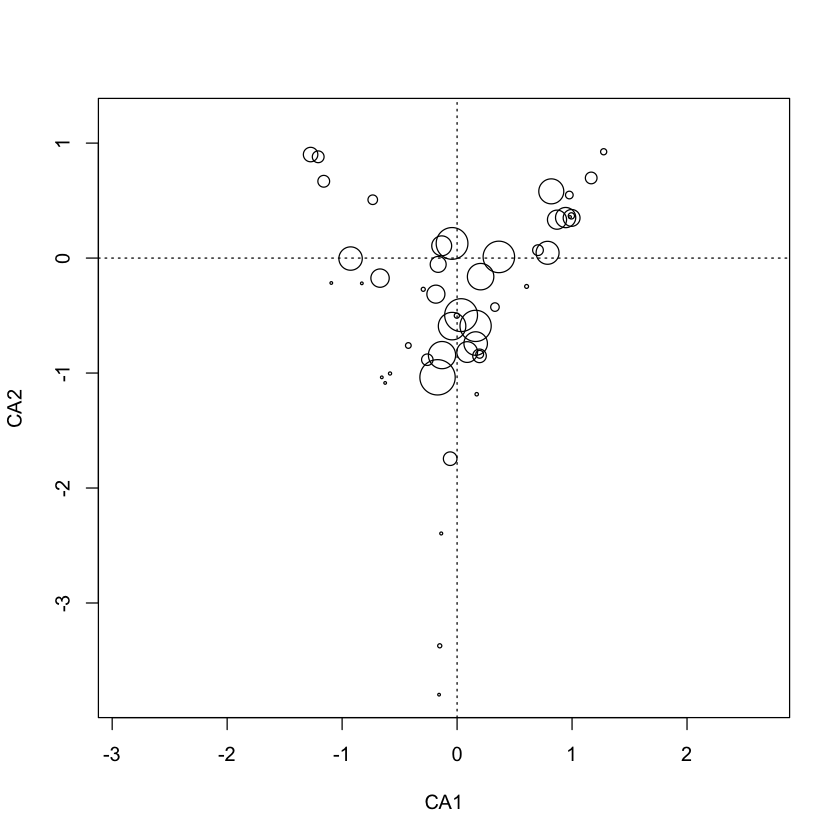

integer(0)

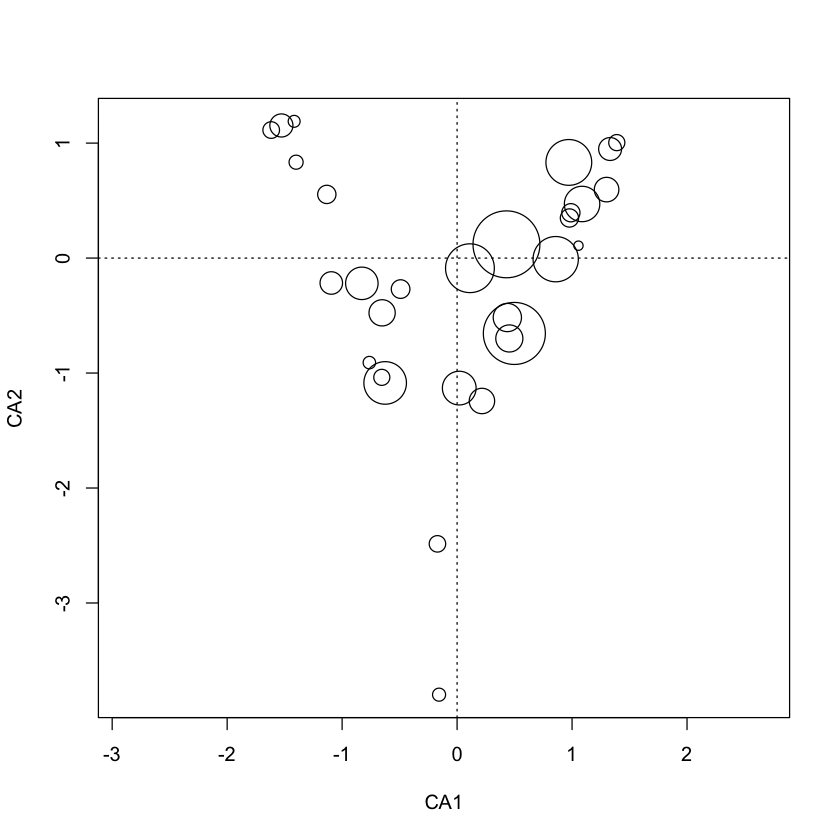

In [33]:
#calculate relavant diversity info
#size of the bubbles reflect the diversity of the points
ca.plot <- plot(pondsca, type = "n")
#identifys species richness
points(pondsca, display = "species", cex = 0.3 * spp.n2)
identify(ca.plot, what = "species", col = "red", ps = 10)  #to label the plotting symbols after plotting.
#
plot(pondsca, type = "n")
points(pondsca, display = "sites", cex = 0.5 * site.n2)
identify(ca.plot, what = "sites", col = "red", ps = 10)

In [34]:
#Are outlying species common or rare?
#outlying species are rare

#Are outlying samples dominated by a few, rare, species?
#i would say yes, but what about top left corner

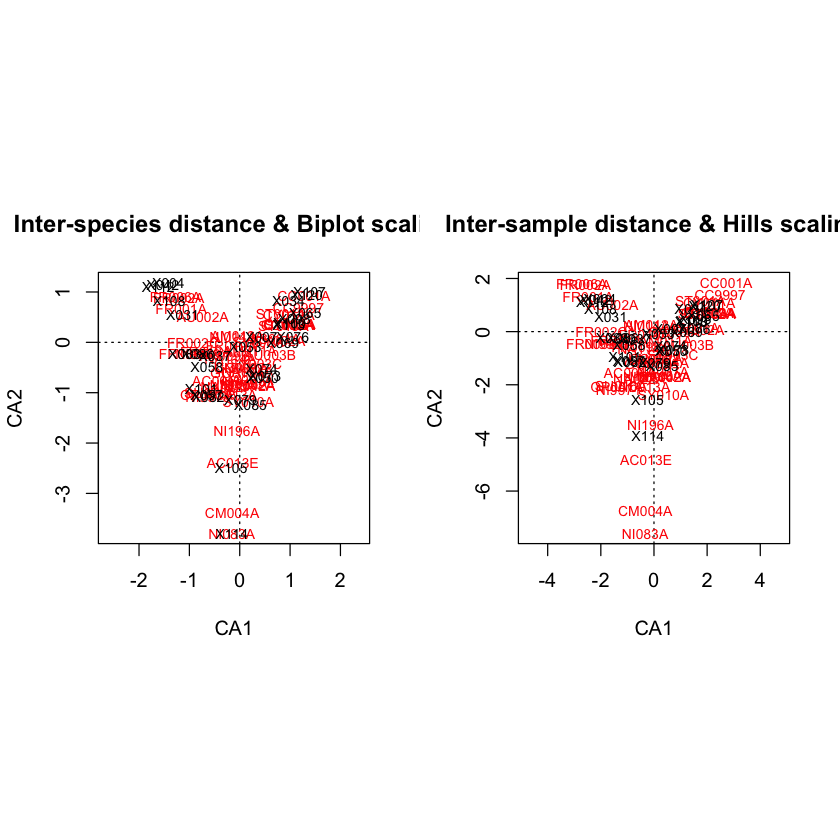

In [35]:


oldpar <- par(mfrow = c(1,2), pty = "s")
plot(pondsca, scaling = "species",
    main = "Inter-species distance & Biplot scaling")
plot(pondsca, scaling = "sites", hill = TRUE,
    main = "Inter-sample distance & Hills scaling")

In [36]:
par(oldpar)

In [37]:
#What effect does the choice of scaling have on the ordination plots? 
#Use the code above to display the biplots with two different scalings.

In [ ]:
#does not change the shape of the plots but does change the density of 

In [ ]:
                    #NDMS

In [6]:
library(MASS)
set.seed(123456)
euclid.dis <- vegdist(scale(pondsenv), "euclidean")
nmds.env <- metaMDS(pondsenv, distance = "euclidean", trymax = 50)

'comm' has negative data: 'autotransform', 'noshare' and 'wascores' set to FALSE



Run 0 stress 0.1739177 
Run 1 stress 0.2151342 
Run 2 stress 0.1739174 
... New best solution
... Procrustes: rmse 0.000116887  max resid 0.0005176917 
... Similar to previous best
Run 3 stress 0.1739187 
... Procrustes: rmse 0.0006034781  max resid 0.0028008 
... Similar to previous best
Run 4 stress 0.1785826 
Run 5 stress 0.2199961 
Run 6 stress 0.188833 
Run 7 stress 0.1888448 
Run 8 stress 0.1888293 
Run 9 stress 0.1785827 
Run 10 stress 0.1739184 
... Procrustes: rmse 0.001983074  max resid 0.009166062 
... Similar to previous best
Run 11 stress 0.1785824 
Run 12 stress 0.1888302 
Run 13 stress 0.2148062 
Run 14 stress 0.1739178 
... Procrustes: rmse 0.0002252463  max resid 0.001042586 
... Similar to previous best
Run 15 stress 0.2400498 
Run 16 stress 0.1739173 
... New best solution
... Procrustes: rmse 8.813286e-05  max resid 0.0004016266 
... Similar to previous best
Run 17 stress 0.173918 
... Procrustes: rmse 0.00168865  max resid 0.007805522 
... Similar to previous best


nmds.env

In [7]:
nmds.env


Call:
metaMDS(comm = pondsenv, distance = "euclidean", trymax = 50) 

global Multidimensional Scaling using monoMDS

Data:     pondsenv 
Distance: euclidean 

Dimensions: 2 
Stress:     0.1739173 
Stress type 1, weak ties
Best solution was repeated 4 times in 20 tries
The best solution was from try 16 (random start)
Scaling: centring, PC rotation 
Species: scores missing


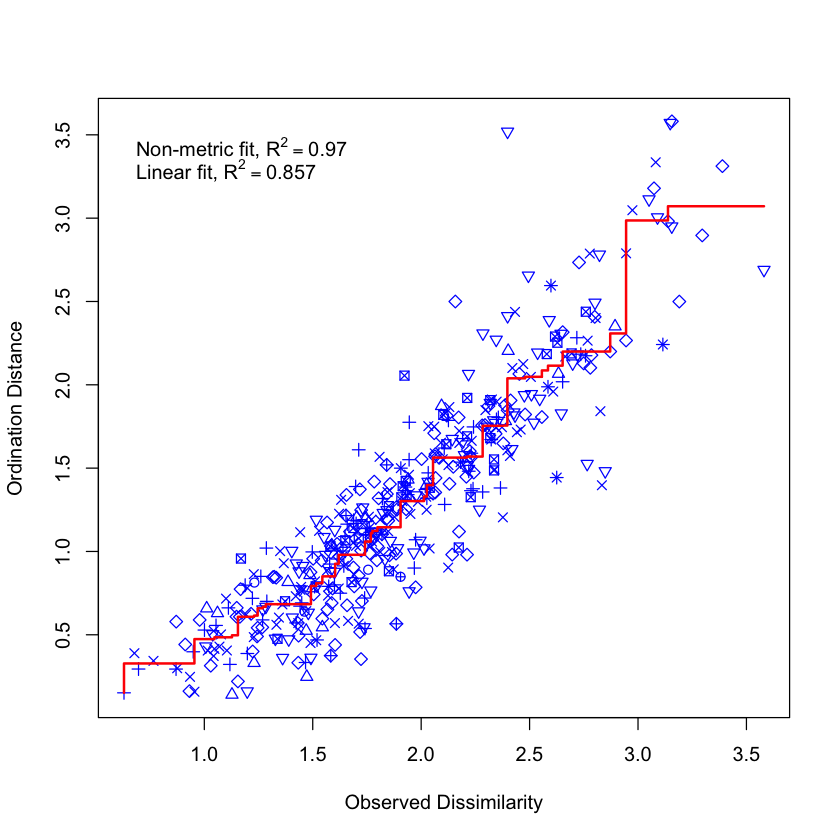

In [8]:
stressplot(nmds.env, euclid.dis)

species scores not available



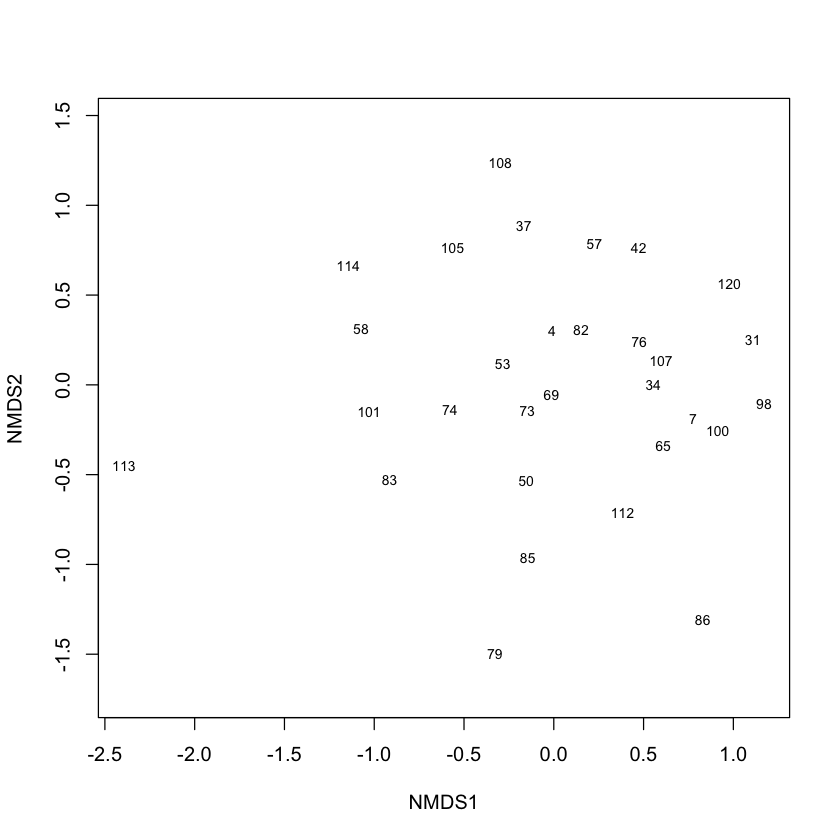

In [9]:
#draw the ordination diagram for the NMDS model
plot(nmds.env, type = "text")

In [10]:
#Procrustes rotation is a good way of of comparing ordination configurations
pondsenv.pro <- procrustes(nmds.env, pondspca, symmetric = TRUE)
summary(pondsenv.pro)


Call:
procrustes(X = nmds.env, Y = pondspca, symmetric = TRUE) 

Number of objects: 30    Number of dimensions: 2 

Procrustes sum of squares:  
 0.2452767 
Procrustes root mean squared error: 
 0.09042063 
Quantiles of Procrustes errors:
        Min          1Q      Median          3Q         Max 
0.007698397 0.027309452 0.050130949 0.078478840 0.358327292 

Rotation matrix:
           [,1]       [,2]
[1,] -0.5064739  0.8622553
[2,] -0.8622553 -0.5064739

Translation of averages:
              [,1]         [,2]
[1,] -1.021833e-18 2.401068e-18

Scaling of target:
[1] 0.8687481


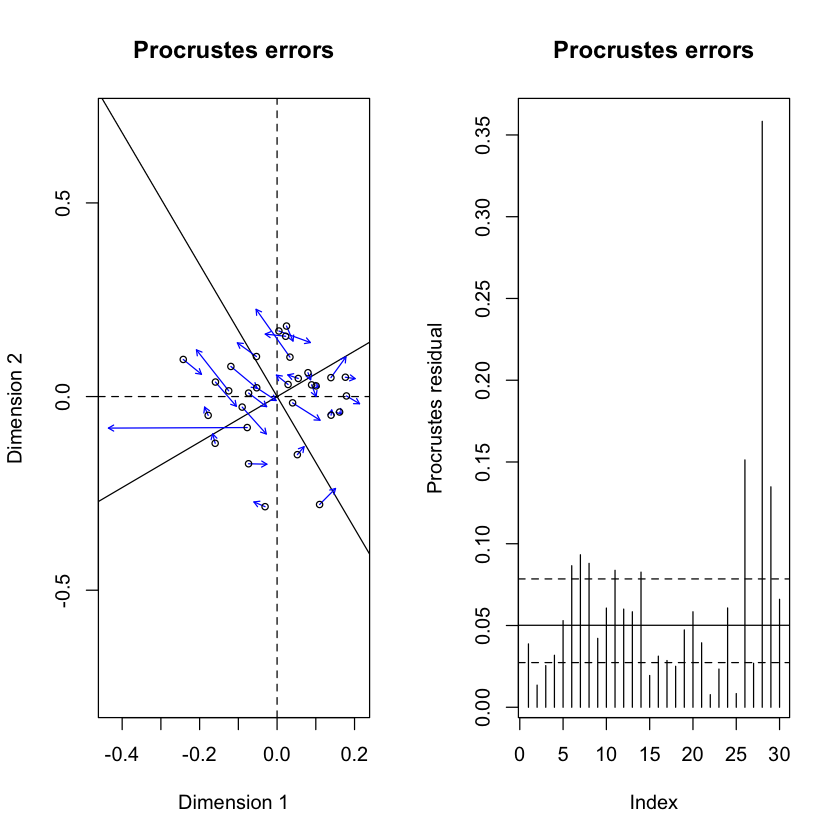

In [11]:
#1 ordination diagram comparing config
#2 residuals plot
par(mfrow = c(1,2))
plot(pondsenv.pro, kind = "1")
plot(pondsenv.pro, kind = "2")
par(mfrow = c(1,1))

In [12]:
#The longer the arrow the bigger the discrpancy for that sample betwene the two configurations

#the second shows the lnegth of the lines, indicates which smaples are poorly matched between the two configurations.
par(mfrow = c(1,1))

In [13]:
#test whether they are significantly similar to one another by means of a permutation test
set.seed(123456)
pondsenv.prot <- protest(nmds.env, pondspca)
pondsenv.prot


Call:
protest(X = nmds.env, Y = pondspca) 

Procrustes Sum of Squares (m12 squared):        0.2453 
Correlation in a symmetric Procrustes rotation: 0.8687 
Significance:  0.001 

Permutation: free
Number of permutations: 999
